# Govt of Nunavut, Dept of Family Services Contracts
Analysis of contracts worth over $5,000 awarded by the Govt of Nunavut. The data last was scraped on March 18, 11:05pm EDT (see scraper.py for the code).

## Importing libraries

In [341]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import seaborn as sns

## Importing the csv file and exploring the data
Import the csv file from the data directory and look for any duplicates, summary stats and inspect random rows.

In [322]:
# Importing the csv file
df = pd.read_csv('./data/data.csv')
print(f"Number of rows and columns in the dataset: {df.shape}")

Number of rows and columns in the dataset: (1847, 8)


In [323]:
# displays summary statistics for numerical columns
df.describe()

,Project Name,Contract Type,Contract Method,Community,Originating Department,Awarded To,Award Date,Award Value
count,1838,1838,1838,1838,1838,1838,1838,1838
unique,342,7,6,32,1,335,559,1574
top,Residential Care,Service Contract,Public Request for Proposals,Iqaluit,Family Services,Bairn Croft Residential Services Inc.,01 April 2014,"$23,500.00"
freq,1054,1006,923,455,1838,126,194,14


## Data Clean Up
There are 1847 rows in the dataframe. However, the describe() function shows there are only 1838 non-empty values. That means there are 9 empty rows. <br> <br>
*Note: Indexes in programming generally start with 0 and jupyter notebook ignores the first row as it's all column names. So the row numbers are offset by 2 ie. if you see row number 296 as empty, it will show as row 298 on any csv file viewer like excel / google sheets.*

In [324]:
# check for empty rows in the DataFrame
empty_rows = df[df.isnull().all(axis=1)]

# print the empty rows and row numbers
print(empty_rows)

     Project Name Contract Type Contract Method Community  \
296           NaN           NaN             NaN       NaN   
297           NaN           NaN             NaN       NaN   
328           NaN           NaN             NaN       NaN   
448           NaN           NaN             NaN       NaN   
449           NaN           NaN             NaN       NaN   
588           NaN           NaN             NaN       NaN   
726           NaN           NaN             NaN       NaN   
756           NaN           NaN             NaN       NaN   
1310          NaN           NaN             NaN       NaN   

     Originating Department Awarded To Award Date Award Value  
296                     NaN        NaN        NaN         NaN  
297                     NaN        NaN        NaN         NaN  
328                     NaN        NaN        NaN         NaN  
448                     NaN        NaN        NaN         NaN  
449                     NaN        NaN        NaN         NaN  
588  

In [325]:
# drop rows that have ALL missing or null values
df = df.dropna(how='all')

# Confirming the null rows have been dropped
print(f"Number of rows and columns in the clean dataset: {df.shape}")

Number of rows and columns in the clean dataset: (1838, 8)


In [326]:
# Print a sample of 10 rows
df.sample(10)

,Project Name,Contract Type,Contract Method,Community,Originating Department,Awarded To,Award Date,Award Value
1752,Residential Care,Consulting,Public Request for Proposals,Rankin Inlet,Family Services,Bairn Croft Residential Services Inc.,29 March 2019,"$483,496.64"
203,Review Child Abuse Response Protocols,Consulting,Public Request for Proposals,Nunavut Territory,Family Services,Michael Rudolph Consulting,17 January 2019,"$14,000.00"
1284,Group Home Windows and Doors Upgrades,Minor Construction or Services,Public Tender,Cambridge Bay,Family Services,Matador Products,15 September 2016,"$173,830.00"
243,SMC Charter,Air Charters,Invitational Tender,Iqaluit,Family Services,Air Nunavut,27 September 2013,"$15,998.00"
870,Residential Care,Service Contract,Public Request for Proposals,Gjoa Haven,Family Services,Sinclair Children's Residence Inc.,01 April 2015,"$97,150.00"
1673,Residential Care,Consulting,Public Request for Proposals,Qikiqtaaluk Region,Family Services,Partners in Parenting Inc.,01 April 2017,"$328,260.00"
403,Residential Care,Consulting,Public Request for Proposals,Iqaluit,Family Services,Stepping Stones Foster Care Inc.,01 April 2017,"$28,811.86"
50,Residential Care,Consulting,Public Request for Proposals,Iqaluit,Family Services,"Stirpe, Stones & Associates",16 January 2016,"$6,638.75"
452,Ford Explorer,Purchase Order,Public Request for Proposals,Arctic Bay,Family Services,Ikpiaryuk Services Ltd.,22 March 2017,"$36,664.00"
1628,Residential Care,Service Contract,Sole Source,Rankin Inlet,Family Services,Bairn Croft Residential Services Inc.,01 April 2020,"$285,348.60"


## Analysis
The data is now clean, let's try and answer the following questions: <br>
- What is the distribution of contract types?
- Which communities have the highest average awarded value?
- What contractors were awarded the most number of contracts?
- What were the most repeating projects?
- What contractors were received the most amount of money?
- What is the distribution of contract methods?
- What is the distribution of awarded dates?

### Distribution of contract types

In [327]:
# count the occurrences of each contract type
contract_counts = df['Contract Type'].value_counts()

print(contract_counts)

Service Contract                  1006
Consulting                         630
Purchase Order                     180
Air Charters                        10
Minor Construction or Services       7
Major Construction                   4
Architectural/Engineering            1
Name: Contract Type, dtype: int64


### Communities with highest average awarded value

In [328]:
# Converting the "Award Value" column from object to string.
df['Award Value'] = df['Award Value'].astype(str)

# remove dollar signs and commas from the Award Value column
df['Award Value'] = df['Award Value'].str.replace('$', '', regex=True).str.replace(',', '', regex=True).astype(float)

# group the data by community and calculate the mean awarded value for each community
awarded_mean = df.groupby('Community')['Award Value'].mean()

# sort the results by the mean awarded value in descending order
awarded_mean_sorted = awarded_mean.sort_values(ascending=False).round(2)

# print the top 10 communities by average awarded value
print(awarded_mean_sorted.head(10))

Community
Kivalliq Region       941427.28
Chesterfield Inlet    908381.37
Kitikmeot Region      525957.47
Qikiqtaaluk Region    307634.51
Rankin Inlet          252845.33
Baker Lake            230600.14
Kugaaruk              207250.48
Gjoa Haven            197513.34
Arviat                171800.69
Sanikiluaq            158495.99
Name: Award Value, dtype: float64


### Contractors with most number of contracts

In [329]:
# group the data by Awarded To, count the number of contracts awarded to each company, 
# and sort the results in descending order
awarded_count = df.groupby('Awarded To')['Awarded To'].count().sort_values(ascending=False)

# print the top 5 companies awarded the most contracts
top_5_awarded_count = awarded_count.head(5)

print('The top 5 companies awarded the most contracts:\n')
for company, count in top_5_awarded_count.items():
    print(f'{company} - {count} contracts')

The top 5 companies awarded the most contracts:

Bairn Croft Residential Services Inc. - 126 contracts
Sinclair Children's Residence Inc. - 107 contracts
I Have a Chance Support Services Ltd. - 103 contracts
Northern Networks Ltd. - 77 contracts
Partners in Parenting Inc. - 69 contracts


### Projects with the most awarded contracts

In [330]:
# count the occurrences of each project name
project_counts = df['Project Name'].value_counts()

# sort the results in descending order
project_counts_sorted = project_counts.sort_values(ascending=False)

# print the top 10 project names with the highest frequency
print(project_counts_sorted.head(5))

Residential Care                          1054
Specialized Residential Care               174
Office Supplies                             50
Specialized Residential Care Treatment      43
Relocation                                  19
Name: Project Name, dtype: int64


### Contractors with the highest total awarded value across all contracts

In [331]:
top_5_companies = df.groupby('Awarded To')['Award Value'].sum().nlargest(5).round(2)
print(top_5_companies)

Awarded To
Bairn Croft Residential Services Inc.    32124635.05
I Have a Chance Support Services Ltd.    20784713.76
March of Dimes Canada                    19420243.44
Protegra Inc.                            13217471.30
Pimakslirvik Corporation                 13137910.04
Name: Award Value, dtype: float64


### Distribution of contract methods

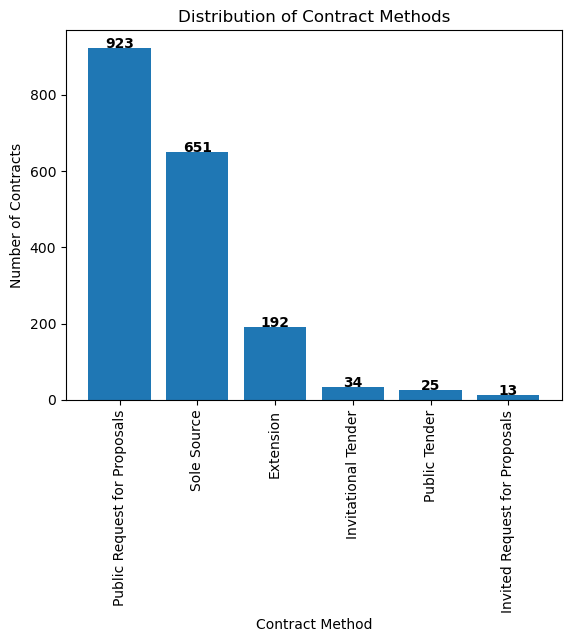

In [346]:
# create a bar chart of the distribution of contract methods
contract_methods = df['Contract Method'].value_counts()

fig, ax = plt.subplots()
ax.bar(contract_methods.index, contract_methods.values)

# set the x-axis label to vertical orientation
plt.xticks(rotation='vertical')

# add text labels to the bars
for i, v in enumerate(contract_methods.values):
    ax.text(i, v, str(v), ha='center', fontweight='bold')
    
ax.set(title='Distribution of Contract Methods', xlabel='Contract Method', ylabel='Number of Contracts')

plt.show()

### Distribution of awarded dates

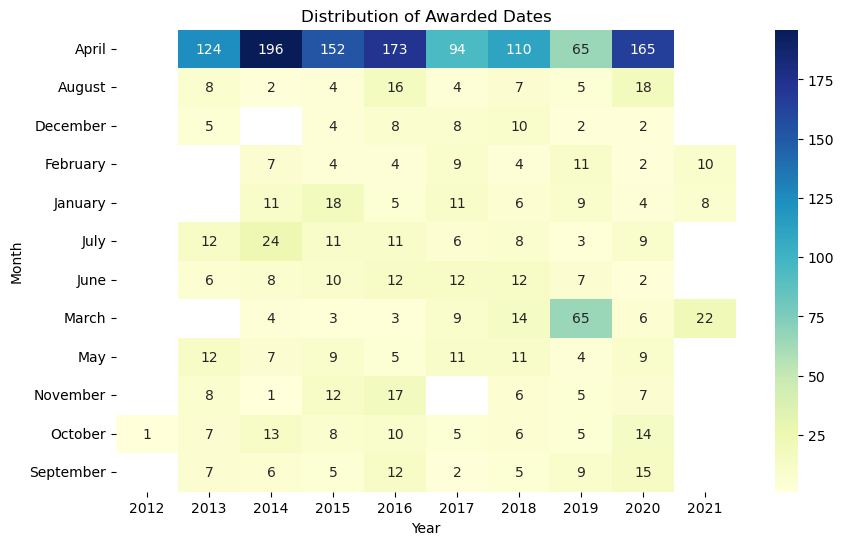

In [342]:
# create a pivot table to count the number of contracts awarded on each day
date_counts = df.groupby('Award Date')['Awarded To'].count()

# reshape the data to create a pivot table
date_counts = date_counts.reset_index(name='count')
date_counts['year'] = pd.DatetimeIndex(date_counts['Award Date']).year
date_counts['month'] = pd.DatetimeIndex(date_counts['Award Date']).month_name()

pivot_table = pd.pivot_table(date_counts, index='month', columns='year', values='count', aggfunc='sum')

# create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='g')
plt.title('Distribution of Awarded Dates')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()